# Challenge: Data cleaning & validation

>Data cleaning is definitely a "practice makes perfect" skill. Using this dataset of article open-access prices paid by the WELLCOME Trust between 2012 and 2013, determine the five most common journals and the total articles for each. Next, calculate the mean, median, and standard deviation of the open-access cost per article for each journal . You will need to do considerable data cleaning in order to extract accurate estimates, and may want to look into data encoding methods if you get stuck. For a real bonus round, identify the open access prices paid by subject area.

>As noted in the previous assignment, don't modify the data directly. Instead, write a cleaning script that will load the raw data and whip it into shape. Jupyter notebooks are a great format for this. Keep a record of your decisions: well-commented code is a must for recording your data cleaning decision-making progress. Submit a link to your script and results below and discuss it with your mentor at your next session.

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from numpy import NaN

In [58]:
df = pd.read_csv('/Users/jAir/jarod347/Research/thinkful/WELLCOME_APCspend2013_forThinkful.csv', encoding = 'unicode_escape')

In [59]:
df.head()

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2127 entries, 0 to 2126
Data columns (total 5 columns):
PMID/PMCID                                             1928 non-null object
Publisher                                              2127 non-null object
Journal title                                          2126 non-null object
Article title                                          2127 non-null object
COST (£) charged to Wellcome (inc VAT when charged)    2127 non-null object
dtypes: object(5)
memory usage: 83.2+ KB


In [61]:
items_counts = df['Journal title'].value_counts()
items_counts[0:5]

PLoS One                                           92
PLoS ONE                                           62
Journal of Biological Chemistry                    48
Nucleic Acids Research                             21
Proceedings of the National Academy of Sciences    19
Name: Journal title, dtype: int64

In [62]:
df.rename(columns={'PMID/PMCID':'pmid', 'Publisher': 'publisher', 'Journal title': 'journal_title', 
                    'Article title': 'article_title', 'COST (£) charged to Wellcome (inc VAT when charged)': 'cost'}, inplace=True)

In [63]:
df.journal_title.value_counts(dropna=False).head()

PLoS One                                           92
PLoS ONE                                           62
Journal of Biological Chemistry                    48
Nucleic Acids Research                             21
Proceedings of the National Academy of Sciences    19
Name: journal_title, dtype: int64

In [64]:
df.describe()

,pmid,publisher,journal_title,article_title,cost
count,1928,2127,2126,2127,2127
unique,1880,299,984,2126,1402
top,-,Elsevier,PLoS One,"Exclusive breastfeeding, diarrhoel morbidity a...",£2040.00
freq,7,387,92,2,94


In [65]:
df['cost'] = df['cost'].map(lambda x: x.lstrip('£').rstrip('£'))

In [69]:
df['cost'] = df['cost'].str.extract('(\d+)', expand=False)

In [70]:
df

,pmid,publisher,journal_title,article_title,cost
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,0
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,2381
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",642
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,669
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,685
5,PMC3579457,ACS,Journal of Medicinal Chemistry,Comparative Structural and Functional Studies ...,2392
6,PMC3709265,ACS,Journal of Proteome Research,Mapping Proteolytic Processing in the Secretom...,2367
7,23057412 PMC3495574,ACS,Mol Pharm,Quantitative silencing of EGFP reporter gene b...,649
8,PMCID: PMC3780468,ACS (Amercian Chemical Society) Publications,ACS Chemical Biology,A Novel Allosteric Inhibitor of the Uridine Di...,1294
9,PMCID: PMC3621575,ACS (Amercian Chemical Society) Publications,ACS Chemical Biology,Chemical proteomic analysis reveals the drugab...,1294


In [74]:
df['cost'] = df['cost'].astype(int)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2127 entries, 0 to 2126
Data columns (total 5 columns):
pmid             1928 non-null object
publisher        2127 non-null object
journal_title    2126 non-null object
article_title    2127 non-null object
cost             2127 non-null int64
dtypes: int64(1), object(4)
memory usage: 83.2+ KB


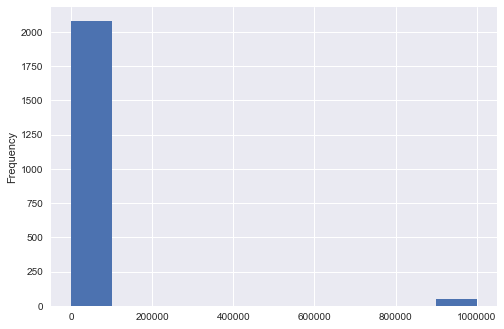

In [76]:
df.cost.plot('hist')
plt.show()

In [81]:
df[df.cost > 300000]

,pmid,publisher,journal_title,article_title,cost
149,PMC3234811,ASBMB,Journal of Biological Chemistry,Picomolar nitric oxide signals from central ne...,999999
227,3708772,BioMed Central,BMC Genomics.,"Phenotypic, genomic, and transcriptional chara...",999999
277,PMC3668259,BMC,Trials,Community resource centres to improve the heal...,999999
358,PMC3219211,Cambridge University Press,Expert Reviews in Molecular Medicine,Pharmacological targets in the ubiquitin syste...,999999
404,PMC3533396,Company of Biologists,Journal of Cell Science,PKA isoforms coordinate mRNA fate during nutri...,999999
410,NaN,CUP,Journal of the International African Institute,"Pharmacy, money and public health in Dakar.",999999
491,PMCID: PMC3464430,Elsevier,Cell,piRNAs can trigger a multigenerational epigene...,999999
560,PMC3632754,Elsevier,Experimental Cell Research,Perturbation of invadolysin disrupts cell migr...,999999
630,Epub ahead of print April 2013 - print in press,Elsevier,Journal of paediatric Urology,Persistent unexplained congenital clitoromegal...,999999
660,PMID:23291342 PMC3581773,Elsevier,Molecluar & Cellular Endocrinology,Periconceptional changes in maternal exposure ...,999999


In [95]:
df.loc[(df['cost'] > 25000)] = NaN

In [96]:
df[df.cost > 25000]

,pmid,publisher,journal_title,article_title,cost


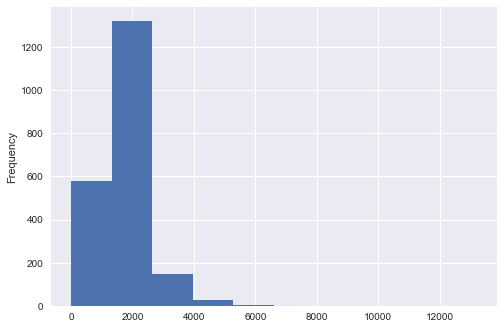

In [97]:
df.cost.plot('hist')
plt.show()

>Next, calculate the mean, median, and standard deviation of the open-access cost per article for each journal .

In [101]:
df.describe()

,cost
count,2078.000000
mean,1827.172762
std,807.108733
min,0.000000
25%,1268.000000
50%,1851.500000
75%,2302.000000
max,13200.000000


In [103]:
df.cost.median()

1851.5